**Initialization**

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.

If you completed the previous course of this specialization, you probably followed our instructions for weight initialization, and it has worked out so far. But how do you choose the initialization for a new neural network? In this notebook, you will see how different initializations lead to different results.

A well chosen initialization can:

* Speed up the convergence of gradient descent

* Increase the odds of gradient descent converging to a lower training (and generalization) error

To get started, run the following cell to load the packages and the planar dataset you will try to classify.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

In [2]:
a = np.array([[1, 2, 3],
             [1, 2, 3]])

In [3]:
np.int64(a>0)

array([[1, 1, 1],
       [1, 1, 1]])

In [4]:
np.nansum(a)

12

In [5]:
a.reshape((a.shape[0], -1)).T

array([[1, 1],
       [2, 2],
       [3, 3]])

In [6]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

In [7]:
# Stack 1-D arrays as columns into a 2-D array.
np.c_[np.array([1,2,3]), np.array([4,5,6])] 

array([[1, 4],
       [2, 5],
       [3, 6]])

**NOTE**

Is matplotlib inline necessary?

The only reason %matplotlib inline is used is to render any matplotlib diagrams even if the plt. show() function is not called. However, even if %matplotlib inline is not used, Jupyter will still display the Matplotlib diagram as an object, with something like matplotlib.

(2, 300)

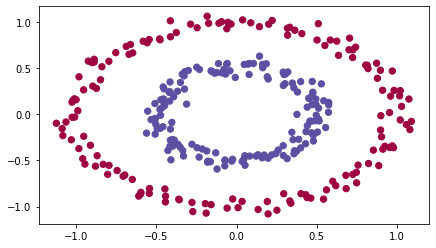

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()
train_X.shape

In [9]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # Number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # initialization parameters dictionary
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization =='random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization =='he':
        parameters = initialize_parameters_he(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Forward propagation
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)
        
        # Backward propagation
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print Loss every 1000 iterration
        if print_cost and i%1000 ==0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)

    # Plot Loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousand)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters    

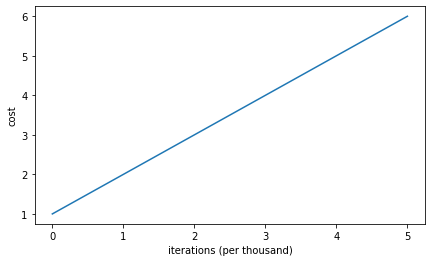

In [10]:
plt.plot(np.ravel(x))
plt.ylabel('cost')
plt.xlabel('iterations (per thousand)')
# plt.title("Learning rate =" + str(learning_rate))
plt.show()

**2 - Zero initialization**

There are two types of parameters to initialize in a neural network:

* the weight matrices 

* the bias vectors 

**Exercise** : Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry", but lets try it anyway and see what happens. Use np.zeros((..,..)) with the correct shapes.

In [11]:
def initialize_parameters_zeros(layers_dims):
    
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [12]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


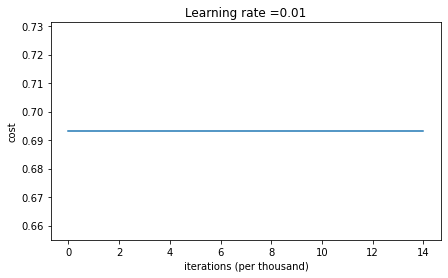

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [13]:
parameters = model(train_X, train_Y, initialization="zeros" )
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:

In [14]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [15]:
def plot_decision_boundary1(model, X, y):
    # Set min and max values and give it some padding
#     x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
#     y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
#     h = 0.01
    # Generate a grid of points with distance h between them
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
#     Z = model(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
#     plt.ylabel('x2')
#     plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

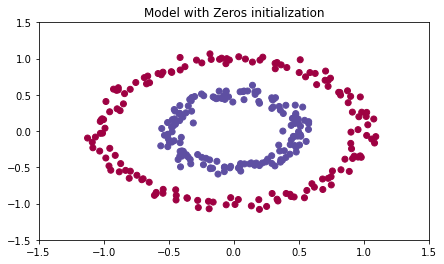

In [16]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary1(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The model is predicting 0 for every example.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with n[l]=1 for every layer, and the network is no more powerful than a linear classifier such as logistic regression.

What you should remember:

* The weights W[l] should be initialized randomly to break symmetry.

* It is however okay to initialize the biases b[l] to zeros. Symmetry is still broken so long as W[l] is initialized randomly.


**3 - Random initialization**
To break symmetry, lets intialize the weights randomly. 
Following random initialization, each neuron can then proceed to learn a different function of its inputs. 
In this exercise, you will see what happens if the weights are intialized randomly, but to very large values.

**Exercise:** Implement the following function to initialize your weights to large random values (scaled by *10) and 
    your biases to zeros. Use np.random.randn(..,..) * 10 for weights and np.zeros((.., ..)) for biases. We are using 
    a fixed np.random.seed(..) to make sure your "random" weights match ours, so don't worry if running several times 
    your code gives you always the same initial values for the parameters.

In [33]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [34]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: inf
Cost after iteration 1000: 0.4643658607349046
Cost after iteration 2000: 0.2913219674953863
Cost after iteration 3000: 0.1719771729574497
Cost after iteration 4000: 0.06814240275548261
Cost after iteration 5000: 0.038123739996690234
Cost after iteration 6000: 0.027792235176882715
Cost after iteration 7000: 0.02197058131973374
Cost after iteration 8000: 0.018159363677418324
Cost after iteration 9000: 0.015464784465958448
Cost after iteration 10000: 0.013459735969366097
Cost after iteration 11000: 0.011910870799344516
Cost after iteration 12000: 0.010678389321688938
Cost after iteration 13000: 0.009675218460652309
Cost after iteration 14000: 0.008843093897505634


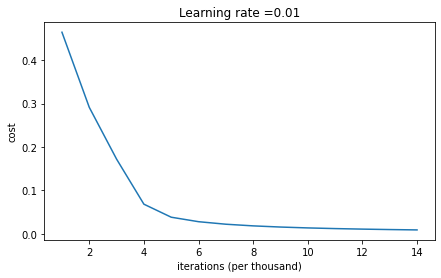

on the train set
Accuracy: 1.0
on the test set
Accuracy: 0.63


In [35]:
parameters = model(train_X, train_Y, initialization="random")
print("on the train set")
predictions_train = predict(train_X, train_Y, parameters)
print("on the test set")
predictions_test = predict(test_X, test_Y, parameters)

In [36]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]]


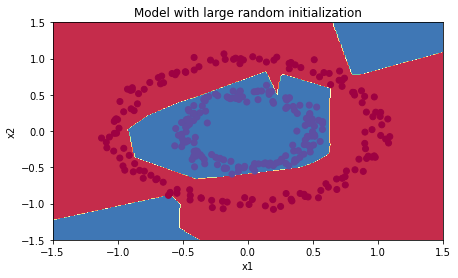

In [37]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations:**

The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when log(a[3])=log(0), the loss goes to infinity.

Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

**In summary:**

Initializing weights to very large random values does not work well.
Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part!


**4 - He initialization**
Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights  of sqrt(1./layers_dims[l-1]) where He initialization would use sqrt(2./layers_dims[l-1]).)

Exercise: Implement the following function to initialize your parameters with He initialization.

Hint: This function is similar to the previous initialize_parameters_random(...). The only difference is that instead of multiplying np.random.randn(..,..) by 10, you will multiply it by 
 
, which is what He initialization recommends for layers with a ReLU activation.

In [38]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1
    
    import math
    for l in range(1, L + 1):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * math.sqrt(2./layers_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1)) * math.sqrt(2./layers_dims[l-1])
    return parameters
    

In [39]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.9248461693483819
Cost after iteration 1000: 0.5826524156513297
Cost after iteration 2000: 0.28582668581323756
Cost after iteration 3000: 0.13285212389074144
Cost after iteration 4000: 0.0766082734958111
Cost after iteration 5000: 0.04988813760364205
Cost after iteration 6000: 0.03519372749048298
Cost after iteration 7000: 0.025861421862613865
Cost after iteration 8000: 0.019556841137712905
Cost after iteration 9000: 0.015390213651622436
Cost after iteration 10000: 0.012514121950233442
Cost after iteration 11000: 0.010424039388973827
Cost after iteration 12000: 0.008850623697308865
Cost after iteration 13000: 0.007636893603474473
Cost after iteration 14000: 0.006680518805888082


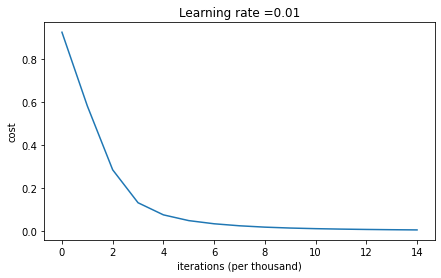

On the train set:
Accuracy: 1.0
On the test set:
Accuracy: 0.56


In [40]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

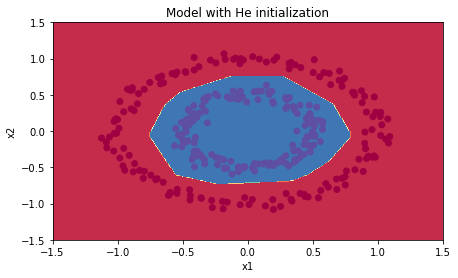

In [41]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**What you should remember from this notebook:**

* Different initializations lead to different results
* Random initialization is used to break symmetry and make sure different hidden units can learn different things
* Don't intialize to values that are too large
* He initialization works well for networks with ReLU activations.